In [13]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from scipy.spatial import distance
import warnings
warnings.filterwarnings("ignore")

In [14]:
url = 'https://drive.google.com/file/d/1vuIGiBWieIcheFwg2HYMPN2R5I3KWEpX/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [15]:
# Q1

# Select a season to work on
new_df = df.loc[df['season'] == 20202021]

# Obtain the count for all shots
shots_count = new_df['shot_type'].count()

# Obtain the count for each shot type
shots_per_type = new_df.groupby('shot_type')['shot_type'].count()

# Obtain the goals count per shot type
goal_per_shot_type = (new_df.loc[new_df['result_event'] == 'Goal']).groupby('shot_type')['shot_type'].count()

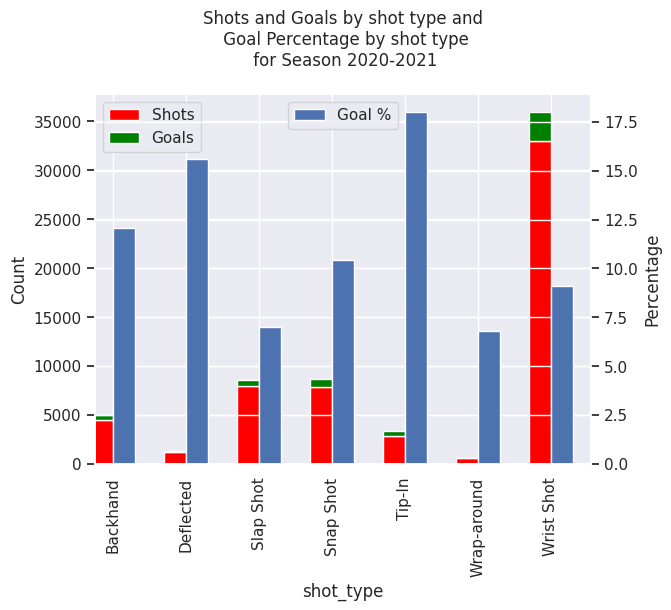

In [16]:
# Representation of Shots accross all teams vs Goals by shot type for the selected season year
# Data for the x and y axis

df2 = pd.concat([shots_per_type, goal_per_shot_type], axis =1, keys=['Shots', 'Goals'])

fig = plt.figure()

ax = fig.add_subplot(111)
ax2 = ax.twinx()
width= 0.3

df2.plot(kind='bar', color=['red', 'green'], stacked=True, ax=ax, width=width, position=1)
ax.set_ylabel('Count')

df2['percentage'] = ((df2['Goals'] / df2['Shots'])*100).round(2)
line2 = df2.percentage.plot(kind='bar', ax=ax2, width=width, position=0)
line2.set_ylabel('Percentage')
line2.legend(['Goal %'], loc='upper center')

plt.title("Shots and Goals by shot type and\n Goal Percentage by shot type\n for Season 2020-2021\n")
plt.show()

In [17]:
# Q2
# Select multiple seasons starting 2018-2019 up to 2020-2021
# Explore the relationship between the distance a shot was taken and the chance it was a goal
# Describe briefly each figure and notice any change over the seasons. Why use this particular figure? 

# Get the different dataframes for each season between 2018 and 2020
df_2018 = df.loc[df['season'] == 20182019].filter(['result_event', 'x_coord', 'y_coord', 'shot_type'])
df_2019 = df.loc[df['season'] == 20192020].filter(['result_event', 'x_coord', 'y_coord'])
df_2020 = df.loc[df['season'] == 20202021].filter(['result_event', 'x_coord', 'y_coord'])
df_2018

,result_event,x_coord,y_coord,shot_type
167536,Shot,-57.0,29.0,Wrist Shot
167537,Shot,-44.0,18.0,Wrist Shot
167538,Goal,80.0,-8.0,Backhand
167539,Shot,73.0,0.0,Wrist Shot
167540,Shot,-8.0,-33.0,Wrist Shot
...,...,...,...,...
253470,Shot,67.0,-19.0,Slap Shot
253471,Shot,-78.0,1.0,Wrist Shot
253472,Shot,-82.0,10.0,Wrist Shot
253473,Shot,-81.0,1.0,Wrist Shot


In [18]:
df_2018['dist'] = np.sqrt(np.square(90 - abs(df_2018['x_coord'])) + np.square(df_2018['y_coord']))
df_2019['dist'] = np.sqrt(np.square(90 - abs(df_2019['x_coord'])) + np.square(df_2019['y_coord']))
df_2020['dist'] = np.sqrt(np.square(90 - abs(df_2020['x_coord'])) + np.square(df_2020['y_coord']))

In [19]:
df_2018_with_type = df_2018.drop(['x_coord', 'y_coord'], axis=1)
df_2018 = df_2018.drop(['x_coord', 'y_coord', 'shot_type'], axis =1)
df_2019 = df_2019.drop(['x_coord', 'y_coord'], axis =1)
df_2020 = df_2020.drop(['x_coord', 'y_coord'], axis =1)
df_2018_with_type

,result_event,shot_type,dist
167536,Shot,Wrist Shot,43.931765
167537,Shot,Wrist Shot,49.396356
167538,Goal,Backhand,12.806248
167539,Shot,Wrist Shot,17.000000
167540,Shot,Wrist Shot,88.391176
...,...,...,...
253470,Shot,Slap Shot,29.832868
253471,Shot,Wrist Shot,12.041595
253472,Shot,Wrist Shot,12.806248
253473,Shot,Wrist Shot,9.055385


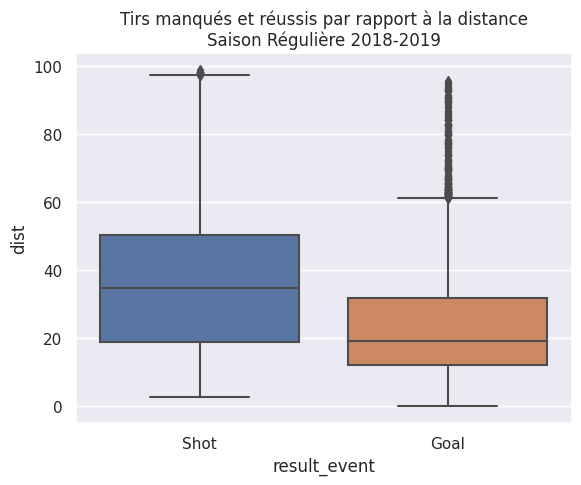

In [20]:
# Plot for season 2018-2019
sns.set(style="darkgrid")
sns.boxplot(x=df_2018['result_event'], y=df_2018['dist'])
plt.title('Tirs manqués et réussis par rapport à la distance\nSaison Régulière 2018-2019')
plt.show()


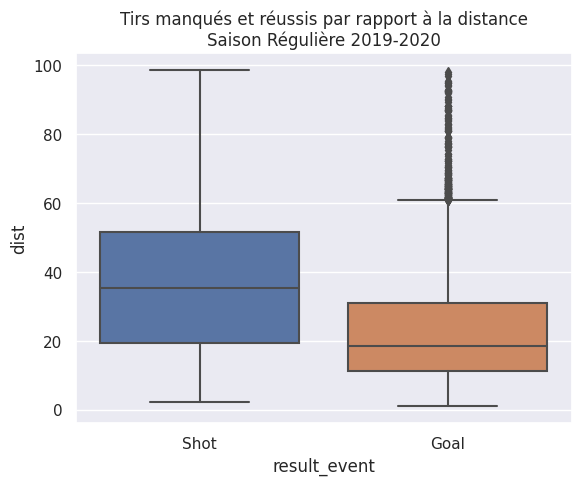

In [21]:
# Plot for season 2019-2020
sns.set(style="darkgrid")
sns.boxplot(x=df_2019['result_event'], y=df_2019['dist'])
plt.title('Tirs manqués et réussis par rapport à la distance\nSaison Régulière 2019-2020')
plt.show()

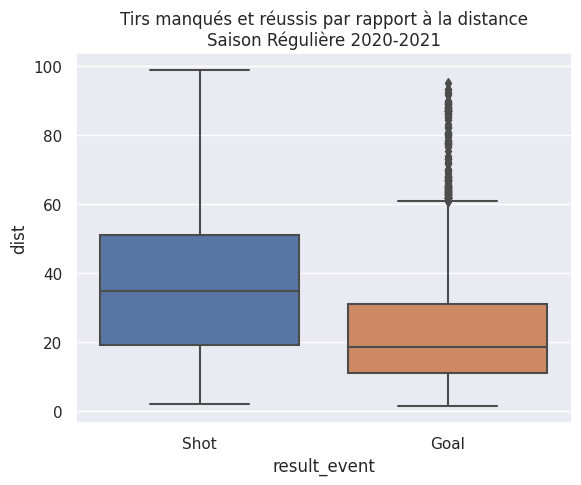

In [22]:
# Plot for season 2020-2021
sns.set(style="darkgrid")
sns.boxplot(x=df_2020['result_event'], y=df_2020['dist'])
plt.title('Tirs manqués et réussis par rapport à la distance\nSaison Régulière 2020-2021')
plt.show()

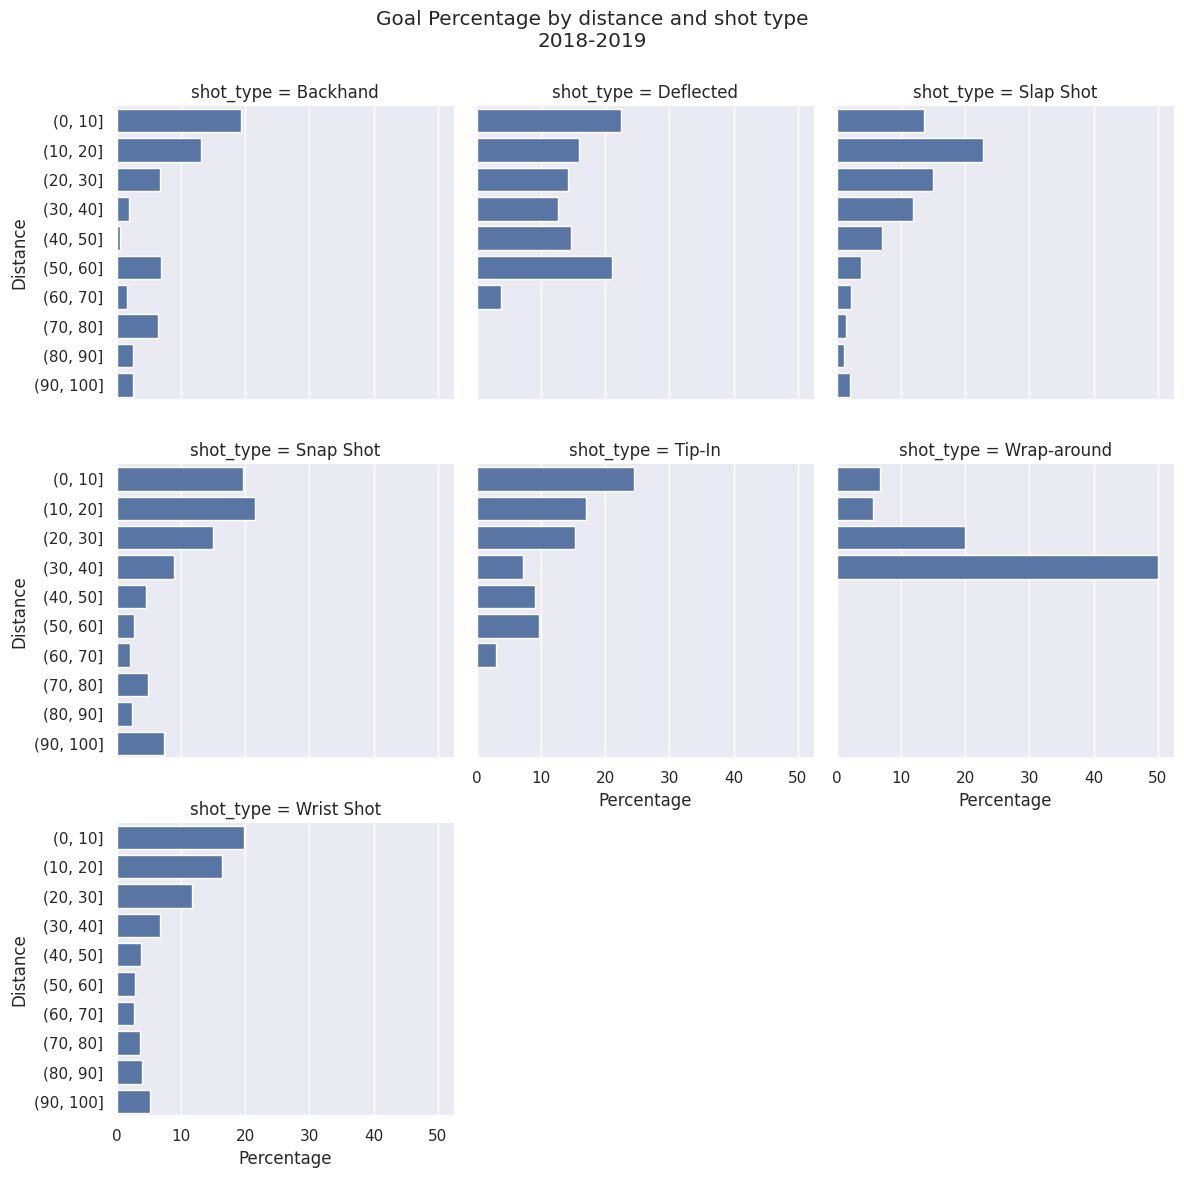

In [23]:
def plotGraph(pframe):
  g = sns.FacetGrid(pframe, col='shot_type', height=4, col_wrap=3)
  g.map(sns.barplot, 'Percentage', 'Distance', orient='h')
  g.fig.subplots_adjust(top=0.9)
  g.fig.suptitle("Goal Percentage by distance and shot type\n2018-2019")
  plt.show()
  print()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # bins for distance

shotGroup= df_2018_with_type
goalGroup = shotGroup.loc[shotGroup['result_event'] == 'Goal']
goalGroup['Distance'] = pd.cut(goalGroup['dist'], bins)
  
visualGoal = goalGroup.groupby(['shot_type','Distance']).size().reset_index(name="goal_count")
  
# Compute the percentage of goal
shotGroup['Distance'] = pd.cut(shotGroup['dist'], bins)
visualAll = shotGroup.groupby(['shot_type','Distance']).size().reset_index(name="shot_count")

visualGoal['shot_count'] = visualAll['shot_count'] # combine the prev line with this one
visualGoal['Percentage'] = visualGoal['goal_count']/visualGoal['shot_count'] * 100
  
plotGraph(visualGoal)